  Survey Date  Total  Total Live  Total Dead  Live Chum  Live Coho  Dead Chum  \
0  2020-10-07      1           1           0          1          0          0   

   Dead Coho  Remnant  
0          0        0  


<AxesSubplot:xlabel='Survey Date'>

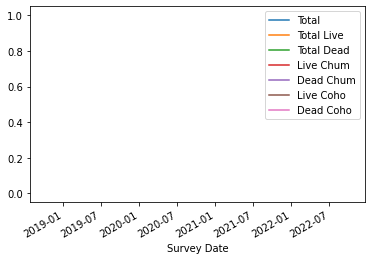

In [1]:
import requests, json, datetime, matplotlib.pyplot, pandas as pd

def getEntries(uri):
    request = requests.get(url = uri)
    df = pd.DataFrame(request.json()['data']['entries'])
    while request.json()['links']['next'] is not None:
        nextURL = request.json()['links']['next']
        request = requests.get(url = nextURL)
        df = df.append(pd.DataFrame(request.json()['data']['entries']))
    return df

def addStats(survey, salmonDf):
    surveyUUID = survey['ec5_uuid']
    todaySalmonDf = salmonDf[salmonDf['ec5_parent_uuid'] == surveyUUID] 
    deadChum = (todaySalmonDf.loc[((todaySalmonDf['12_Species'] == "Chum") & (todaySalmonDf['16_Status'] == "Dead"))].shape[0]) 
    deadCoho = (todaySalmonDf.loc[((todaySalmonDf['12_Species'] == "Coho") & (todaySalmonDf['16_Status'] == "Dead"))].shape[0])
    liveChum = (todaySalmonDf.loc[((todaySalmonDf['12_Species'] == "Chum") & (todaySalmonDf['16_Status'] == "Live"))].shape[0])
    liveCoho = (todaySalmonDf.loc[((todaySalmonDf['12_Species'] == "Coho") & (todaySalmonDf['16_Status'] == "Live"))].shape[0])
    remnant = todaySalmonDf.loc[(todaySalmonDf['16_Status'] == "Remnant")].shape[0]
    totalDead = todaySalmonDf.loc[(todaySalmonDf['16_Status'] == "Dead")].shape[0]
    totalLive = todaySalmonDf.loc[(todaySalmonDf['16_Status'] == "Live")].shape[0]
    total = (todaySalmonDf.shape[0])
    statsRow = pd.Series({'Survey Date': datetime.datetime.strptime(survey['1_Survey_Date'], '%m/%d/%Y'), 'Dead Chum': deadChum, 'Dead Coho': deadCoho, 'Live Chum': liveChum, 'Live Coho': liveCoho, 'Remnant': remnant, 'Total Dead': totalDead, 'Total Live': totalLive, 'Total': total})
    global statsDf
    statsDf = statsDf.append(statsRow, ignore_index = True)
    
pd.set_option('display.precision', 0)
salmonFormURI = "https://five.epicollect.net/api/export/entries/salmon-survey-2020?form_ref=f550ab6c4dab44f49bcc33b7c1904be9_5d6f509867795"
surveyFormURI = "https://five.epicollect.net/api/export/entries/salmon-survey-2020?form_ref=f550ab6c4dab44f49bcc33b7c1904be9_5d6f454667a28"
salmonDf = getEntries(salmonFormURI)
surveyDf = getEntries(surveyFormURI)
statsDf = pd.DataFrame()
columnOrder =  ['Survey Date', 'Total', 'Total Live', 'Total Dead', 'Live Chum', 'Live Coho', 'Dead Chum', 'Dead Coho', 'Remnant']
surveyDf.apply(addStats, axis=1, args=[salmonDf])
print(statsDf.sort_values(by=['Survey Date'])[columnOrder])
statsDf.plot(y=['Total', 'Total Live', 'Total Dead', 'Live Chum', 'Dead Chum', 'Live Coho', 'Dead Coho'], x='Survey Date')